In [1]:
# MODIFY!
notebook_name = 'baseline'

# Import Libaries & Define Functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [3]:
sns.set(style='whitegrid')

In [4]:
def frame_it(path):
    csv_files = glob.glob(path + '/*.csv')
    df_list = []
    
    for filename in csv_files:
        df = pd.read_csv(filename, index_col='Unnamed: 0', header=0)
        df_list.append(df)

    return pd.concat(df_list, axis=1)

In [5]:
def show_values_on_bars(axs, h_v="v", space=0.4,pct=False,neg=False):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                if pct == True: 
                    value = '{:.2%}'.format(p.get_height())
                else: 
                    value = '{:.2f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                if pct == True: 
                    value = '{:.2%}'.format(p.get_width())
                else: 
                    value = '{:.2f}'.format(p.get_width())
                if neg == True: 
                    ax.text(_x, _y, value, ha="right")
                else:
                    ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

# Analysis

In [6]:
# MODIFY!
df = frame_it('./baseline-err')
# we tranpose the data frame for the analysis

In [7]:
df = df.T
# we transpose the data frame due to way we exported the data

In [8]:
df_rmse = df.sort_values('RMSE')
df_rmse

,MAE,MSE,RMSE
rf-baseline-no,2.817641,16.563418,4.069818
rf-baseline-wo,2.984313,17.890513,4.229718
poi-baseline-no,4.542677,31.798869,5.639049
poi-baseline-wo,4.533693,32.143539,5.669527
svr-baseline-wo,5.204604,42.882650,6.548485
svr-baseline-no,5.331661,44.914843,6.701854


In [9]:
df_rmse.to_csv(f'./analysis/{notebook_name}.csv')

## ERR Values [MBit/s] and [(MBit/s)^2]

In [10]:
df_rmse.style.highlight_min(color = 'grey', axis = 0).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}])

,MAE,MSE,RMSE
rf-baseline-no,2.817641,16.563418,4.069818
rf-baseline-wo,2.984313,17.890513,4.229718
poi-baseline-no,4.542677,31.798869,5.639049
poi-baseline-wo,4.533693,32.143539,5.669527
svr-baseline-wo,5.204604,42.882650,6.548485
svr-baseline-no,5.331661,44.914843,6.701854


## RMSE Performance Decline based on Best Performance [%]

In [11]:
df_rmse_min = df_rmse.apply(lambda value : -((value/df.min())-1),axis=1)

In [12]:
df_rmse_min = df_rmse_min.sort_values('RMSE',ascending=False)

In [13]:
df_rmse_min.to_csv(f'./analysis/{notebook_name}-min.csv')

In [14]:
df_rmse_min.style.highlight_max(color = 'grey', axis = 0).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}]).format('{:.2%}')

,MAE,MSE,RMSE
rf-baseline-no,-0.00%,-0.00%,-0.00%
rf-baseline-wo,-5.92%,-8.01%,-3.93%
poi-baseline-no,-61.22%,-91.98%,-38.56%
poi-baseline-wo,-60.90%,-94.06%,-39.31%
svr-baseline-wo,-84.71%,-158.90%,-60.90%
svr-baseline-no,-89.22%,-171.17%,-64.67%


## RMSE Performance Increment based on Worst Performance [%]

In [15]:
df_rmse_max = df.apply(lambda value : abs((value/df.max())-1),axis=1)

In [16]:
df_rmse_max = df_rmse_max.sort_values('RMSE',ascending=False)

In [17]:
df_rmse_max.to_csv(f'./analysis/{notebook_name}-max.csv')

In [18]:
df_rmse_max.style.highlight_max(color = 'grey', axis = 0).set_table_styles([{'selector': 'tr:hover','props': [('background-color', '')]}]).format('{:.2%}')
# the information in this table is not that meaningful / useful

,MAE,MSE,RMSE
rf-baseline-no,47.15%,63.12%,39.27%
rf-baseline-wo,44.03%,60.17%,36.89%
poi-baseline-no,14.80%,29.20%,15.86%
poi-baseline-wo,14.97%,28.43%,15.40%
svr-baseline-wo,2.38%,4.52%,2.29%
svr-baseline-no,0.00%,0.00%,0.00%


# Visualization

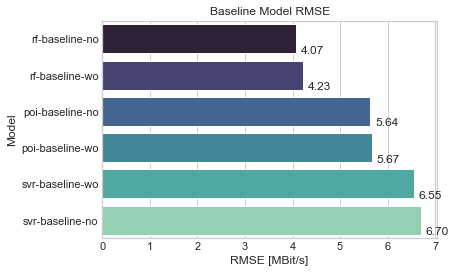

In [19]:
ax = sns.barplot(data=df_rmse, x='RMSE',y=df_rmse.index, palette='mako')
show_values_on_bars(ax, "h", 0.1)
ax.set(ylabel='Model',xlabel='RMSE [MBit/s]')
ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set_title('Baseline Model RMSE');

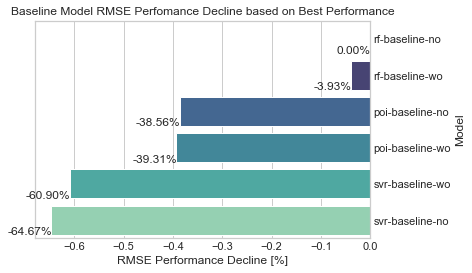

In [20]:
ax = sns.barplot(data=df_rmse_min,x='RMSE',y=df_rmse_min.index,palette='mako')

ax.set(ylabel='Model',xlabel='RMSE Performance Decline [%]')

ax.yaxis.set_label_position("right")
ax.yaxis.set_ticks_position("right")
ax.tick_params(axis=u'both', which=u'both',length=0)

show_values_on_bars(ax,"h",0.001,True,True)

ax.set_title('Baseline Model RMSE Perfomance Decline based on Best Performance');

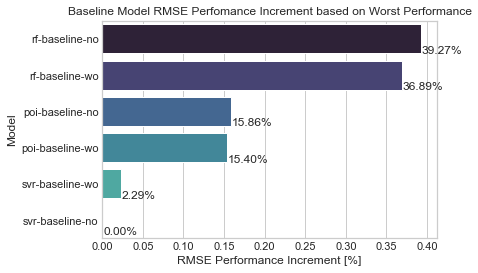

In [21]:
ax = sns.barplot(data=df_rmse_max,x='RMSE',y=df_rmse_max.index,palette='mako')
show_values_on_bars(ax,"h",0.001,True)

ax.tick_params(axis=u'both', which=u'both',length=0)

ax.set(ylabel='Model',xlabel='RMSE Performance Increment [%]')

ax.set_title('Baseline Model RMSE Perfomance Increment based on Worst Performance');

DONE!